In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle

In [4]:
df=pd.read_csv('Preprocesses_data.csv')
df.head()

,Group_1_Reason,Group_2_Reason,Group_3_Reason,Group_4_Reason,Month,Day,Transportation_Expense,Distance,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social drinker,Social smoker,Pet,BMI,Absenteeism
0,0,0,0,1,7,3,289,36,33,239554,97,0,0,2,1,0,1,30,4
1,0,0,0,0,7,3,118,13,50,239554,97,1,0,1,1,0,0,31,0
2,0,0,0,1,7,4,179,51,38,239554,97,0,0,0,1,0,0,31,2
3,1,0,0,0,7,5,279,5,39,239554,97,0,0,2,1,1,0,24,4
4,0,0,0,1,7,5,289,36,33,239554,97,0,0,2,1,0,1,30,2


In [5]:
# Creating Target into a binary variable for classification using median value of absentism
sorted(df['Absenteeism'].unique())

[0, 1, 2, 3, 4, 5, 7, 8, 16, 24, 32, 40, 48, 56, 64, 80, 104, 112, 120]

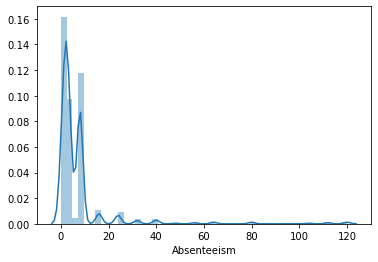

In [7]:
sns.distplot(df['Absenteeism'])
plt.show()

In [8]:
df['Absenteeism'].median()

3.0

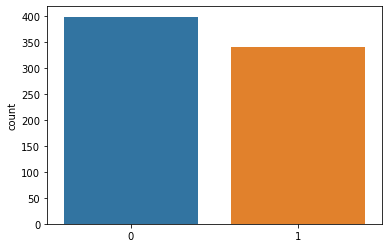

0.4599728629579376

In [9]:
targets=np.where(df['Absenteeism']>df['Absenteeism'].median(),1,0)
sns.countplot(targets)
plt.show()
targets.sum()/targets.shape[0]

## Using Median is numerically stable and rigid as it is not affected by outliers and balances the data,5% of the targets are1's 

In [10]:
df['Excessive Absenteeism']=targets

In [11]:
df=df.drop('Absenteeism',1)
df.head()

,Group_1_Reason,Group_2_Reason,Group_3_Reason,Group_4_Reason,Month,Day,Transportation_Expense,Distance,Age,Workload,Hit_Target,Disciplinary_Failure,Education,Son,Social drinker,Social smoker,Pet,BMI,Excessive Absenteeism
0,0,0,0,1,7,3,289,36,33,239554,97,0,0,2,1,0,1,30,1
1,0,0,0,0,7,3,118,13,50,239554,97,1,0,1,1,0,0,31,0
2,0,0,0,1,7,4,179,51,38,239554,97,0,0,0,1,0,0,31,0
3,1,0,0,0,7,5,279,5,39,239554,97,0,0,2,1,1,0,24,1
4,0,0,0,1,7,5,289,36,33,239554,97,0,0,2,1,0,1,30,0


In [13]:
#splitting the data 
X=df.iloc[:,:-1]
y=df['Excessive Absenteeism']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=20,stratify=y)
X_train.shape,X_test.shape

((589, 18), (148, 18))

In [14]:
y_train.value_counts(1),y_test.value_counts(1)

(0    0.539898
 1    0.460102
 Name: Excessive Absenteeism, dtype: float64,
 0    0.540541
 1    0.459459
 Name: Excessive Absenteeism, dtype: float64)

In [15]:
# Data Standarization
X_train.columns

Index(['Group_1_Reason', 'Group_2_Reason', 'Group_3_Reason', 'Group_4_Reason',
       'Month', 'Day', 'Transportation_Expense', 'Distance', 'Age', 'Workload',
       'Hit_Target', 'Disciplinary_Failure', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'BMI'],
      dtype='object')

In [16]:
cols_scale=['Month','Day','Transportation_Expense','Distance', 'Age', 'Workload',
       'Hit_Target','Son','Pet','BMI']
cols_dummy=['Group_1_Reason', 'Group_2_Reason', 'Group_3_Reason', 'Group_4_Reason',
           'Disciplinary_Failure', 'Education','Social drinker', 'Social smoker']

In [18]:
ss=StandardScaler()
X_train_scale=pd.DataFrame(ss.fit_transform(X_train[cols_scale]),columns=cols_scale)
X_train=pd.concat([X_train_scale,X_train[cols_dummy].reset_index(drop=True)],axis=1)[X_train.columns]
X_train.shape

(589, 18)

In [19]:
X_test_scale=pd.DataFrame(ss.fit_transform(X_test[cols_scale]),columns=cols_scale)
X_test=pd.concat([X_test_scale,X_test[cols_dummy].reset_index(drop=True)],axis=1)[X_test.columns]
X_test.shape

(148, 18)

In [20]:
X_test.isna().sum().sum()

0

# Logistic Regression

In [21]:
lr=LogisticRegression(random_state=351,n_jobs=-1)
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.7589134125636672

# coefficients and intercept

In [22]:
lr.intercept_

array([-0.63277404])

In [23]:
lr.coef_

array([[ 1.36750556,  0.25895511,  1.63667105, -0.41918108,  0.10968958,
        -0.19167576,  0.46694929, -0.16570712, -0.13036306, -0.03065993,
        -0.05409111, -2.8412235 ,  0.01679679,  0.40878522,  0.6025038 ,
         0.00380296, -0.13072886,  0.13486428]])

array([[ 1.36750556],
       [ 0.25895511],
       [ 1.63667105],
       [-0.41918108],
       [ 0.10968958],
       [-0.19167576],
       [ 0.46694929],
       [-0.16570712],
       [-0.13036306],
       [-0.03065993],
       [-0.05409111],
       [-2.8412235 ],
       [ 0.01679679],
       [ 0.40878522],
       [ 0.6025038 ],
       [ 0.00380296],
       [-0.13072886],
       [ 0.13486428]])

In [25]:
feature_names=X_train.columns.values
feature_names

array(['Group_1_Reason', 'Group_2_Reason', 'Group_3_Reason',
       'Group_4_Reason', 'Month', 'Day', 'Transportation_Expense',
       'Distance', 'Age', 'Workload', 'Hit_Target',
       'Disciplinary_Failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'BMI'], dtype=object)

In [31]:
summary_table=pd.DataFrame({'Feature Name':feature_names})
summary_table['Coefficients']=lr.coef_.T
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',lr.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-0.632774
1,Group_1_Reason,1.367506
2,Group_2_Reason,0.258955
3,Group_3_Reason,1.636671
4,Group_4_Reason,-0.419181
5,Month,0.109690
6,Day,-0.191676
7,Transportation_Expense,0.466949
8,Distance,-0.165707
9,Age,-0.130363


# Interpretating the coefficients

In [33]:
summary_table['Odd_ratio']=np.exp(summary_table['Coefficients'])
summary_table.sort_values('Odd_ratio',ascending=False)

,Feature Name,Coefficients,Odd_ratio
3,Group_3_Reason,1.636671,5.138037
1,Group_1_Reason,1.367506,3.925546
15,Social drinker,0.602504,1.826687
7,Transportation_Expense,0.466949,1.595121
14,Son,0.408785,1.504988
2,Group_2_Reason,0.258955,1.295576
18,BMI,0.134864,1.144381
5,Month,0.109690,1.115932
13,Education,0.016797,1.016939
16,Social smoker,0.003803,1.003810


- If the person has cited reason type 3 or reason type 1,his odd of excessive leave increase by 5 and 4 times respectively.
- If a person is a social drinker,his odds of excessive leave increase by 1.8 times.
- If the transportation expense of a person increases by 1 standard deviation unit ,his odds of excessive leave increase by1.5 times.
- If aperson has more number of children,his odds of excessive leave increase by 1.2 times.
- If the BMI of aperson increases by Standard deviation unit, his odds of excessive leave increase by 1.1 units.


# Testing the model

In [36]:
def eval(model,X,y):
    pred=model.predict(X)
    prob=model.predict_proba(X)[:,1]
    print(metrics.classification_report(y,pred))
    metrics.plot_confusion_matrix(model,X,y)
    metrics.plot_roc_curve(model,X,y)
    plt.show()

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        80
           1       0.77      0.78      0.77        68

    accuracy                           0.79       148
   macro avg       0.79      0.79      0.79       148
weighted avg       0.79      0.79      0.79       148



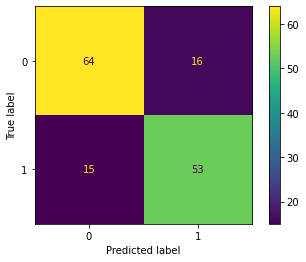

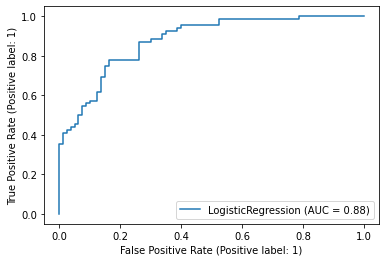

In [37]:
eval(lr,X_test,y_test)

# Random Forest

In [39]:
X=df.iloc[:,:-1]
y=df['Excessive Absenteeism']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,
                                               random_state=20,stratify=y)
X_train.shape,X_test.shape

((589, 18), (148, 18))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       318
           1       0.98      0.97      0.97       271

    accuracy                           0.97       589
   macro avg       0.97      0.97      0.97       589
weighted avg       0.97      0.97      0.97       589



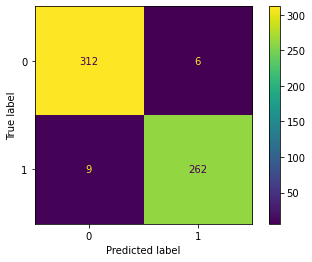

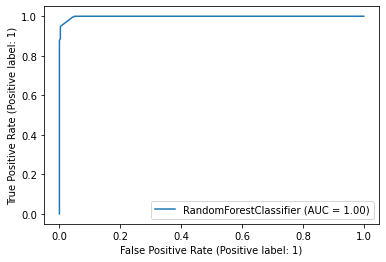

In [40]:
rf=RandomForestClassifier(random_state=20,n_jobs=-1)
rf.fit(X_train,y_train)
eval(rf,X_train,y_train)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        80
           1       0.77      0.79      0.78        68

    accuracy                           0.80       148
   macro avg       0.80      0.80      0.80       148
weighted avg       0.80      0.80      0.80       148



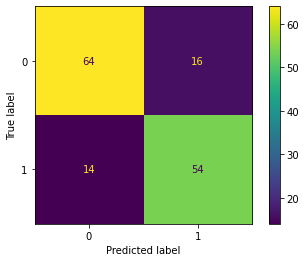

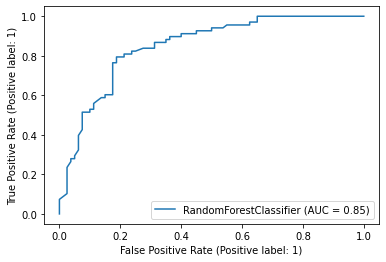

In [41]:
eval(rf,X_test,y_test)

# Tuned Random Forest

In [43]:
rf=RandomForestClassifier(random_state=20,n_jobs=-1)
params={'max_features':np.arange(1,X_train.shape[1]),
       'n_estimators': np.arange(50,500),
       'min_samples_leaf':np.arange(25,50),
       'max_depth':np.arange(2,25),
       'min_samples_split':np.arange(25,50)}
rsearch=RandomizedSearchCV(rf,params,n_jobs=-1,scoring='f1',random_state=20,
                          cv=10,n_iter=100,verbose=2)
rsearch.fit(X_train,y_train)
rsearch.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 410,
 'min_samples_split': 48,
 'min_samples_leaf': 30,
 'max_features': 15,
 'max_depth': 8}

In [44]:
rsearch.best_score_

0.6992750542795915

In [45]:
# Tuned Random Forest

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       318
           1       0.71      0.73      0.72       271

    accuracy                           0.74       589
   macro avg       0.74      0.74      0.74       589
weighted avg       0.74      0.74      0.74       589



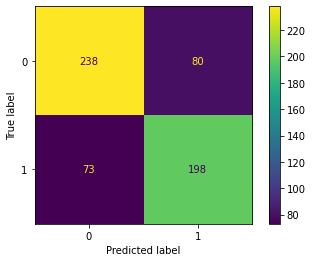

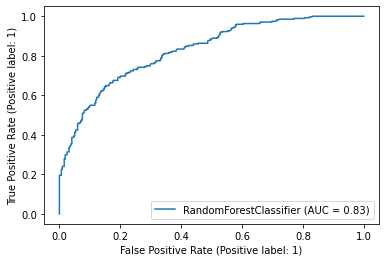

              precision    recall  f1-score   support

           0       0.85      0.75      0.79        80
           1       0.74      0.84      0.79        68

    accuracy                           0.79       148
   macro avg       0.79      0.79      0.79       148
weighted avg       0.80      0.79      0.79       148



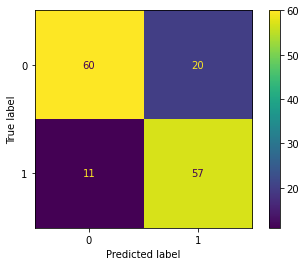

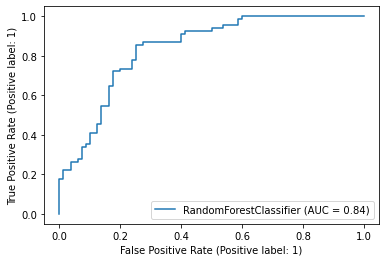

In [46]:
rf=rsearch.best_estimator_
rf.fit(X_train,y_train)
eval(rf,X_train,y_train)
eval(rf,X_test,y_test)

In [47]:
X_test.to_csv('Test_Data.csv',index=False)

In [48]:
# Saving the model

In [49]:
with open('model','wb') as file:
    pickle.dump(rf,file)